<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB01/LAB01_Ana_pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vacunaciones COVID
`` PRÁCTICA 1``

# Descarga del dataset
Descarga de vacunaciones.csv y Countries by Continent.csv guardados en el mismo repositorio de Github.

In [188]:
import requests
import pandas as pd

# URL del archivo CSV en GitHub
urls = ["https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/vacunaciones.csv","https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/Countries.csv"]
nombres = ['vacunaciones.csv','Countries.csv']

for i in range(2):
  # Realizar la solicitud GET para obtener el contenido del archivo
  response = requests.get(urls[i])

  # Verificar si la solicitud fue exitosa (código de estado 200)
  if response.status_code == 200:
      # Guardar el contenido del archivo en un archivo local
      with open(nombres[i], 'wb') as f:
          f.write(response.content)
      print("Archivo descargado exitosamente.")
  else:
      print("Error al descargar el archivo.")



Archivo descargado exitosamente.
Archivo descargado exitosamente.


Cargamos el archivos de paises CSV en un DataFrame de pandas que llamamos `ds_countries`

In [189]:
ds_countries = pd.read_csv('Countries.csv')
# Cambio el nombre
ds_countries.rename(columns={'Country': 'country'}, inplace=True)
# Mostramos las 3 primeras entradas del dataset
ds_countries.head(3)

,Continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin


Cargamos el archivo de vacunaciones CSV en un DataFrame de pandas que llamamos `ds`.


In [190]:
ds = pd.read_csv('vacunaciones.csv')
# Mostramos las 3 primeras entradas del dataset
ds.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.0,0.0,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


# Exploración de la base de datos

Veamos las variables de la base de datos y de qué tipo es cada una.

In [191]:
print(ds.dtypes)

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object


Lo primero que haremos será convertir la variable `date` de tipo `object` a tipo fecha o `datetime`.

In [192]:
# Convertir la columna de fecha a formato datetime
ds['date'] = pd.to_datetime(ds['date'])
print(ds['date'].dtypes)

datetime64[ns]


A continuación veremos sobre que países se hace el estudio:

In [193]:
paises = ds['country'].unique()
print(paises)

['Albania' 'Algeria' 'Andorra' 'Anguilla' 'Argentina' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belgium' 'Bermuda' 'Bolivia'
 'Brazil' 'Bulgaria' 'Cambodia' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Egypt'
 'England' 'Estonia' 'Faeroe Islands' 'Finland' 'France' 'Germany'
 'Gibraltar' 'Greece' 'Greenland' 'Guernsey' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jersey'
 'Kuwait' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Maldives'
 'Malta' 'Mauritius' 'Mexico' 'Monaco' 'Morocco' 'Myanmar' 'Nepal'
 'Netherlands' 'Northern Cyprus' 'Northern Ireland' 'Norway' 'Oman'
 'Pakistan' 'Panama' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia'
 'Saint Helena' 'Saudi Arabia' 'Scotland' 'Serbia' 'Seychelles'
 'Singapore' 'Slovakia' 'Slovenia' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Turkey' 'Turks and Caicos Islands' 'United Arab Emirates'
 'United Kingdom' 'United State

Para hacernos una idea de cuán centrado en cada continente está el dataset vamos a añadir una columna `Continente`:

In [168]:
ds = pd.merge(ds, ds_countries, on='country', how='inner')
ds.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Continent
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Europe
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Europe
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.0,0.0,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,Europe


Nos aseguramos de que no haya ningún continente NaN

In [194]:
cantidad_nan = ds['Continent'].isna().sum()
print(cantidad_nan)

KeyError: 'Continent'

Y graficamos las proporciones de vacunaciones por continente en esta base de datos.

In [170]:
continentes = []
for i, row in ds.iterrows():
  if i>1 and row['country'] != ds.at[i-1, 'country']:
    continentes.append(row['Continent'])

In [171]:
import pandas as pd

# Tu Serie de continentes
continentes = pd.Series(continentes)

# Contar la frecuencia de cada elemento en la Serie
frecuencia = continentes.value_counts()

# Imprimir los resultados
print(frecuencia)



Europe           37
Asia             19
South America     6
Africa            5
North America     5
dtype: int64


In [172]:
# Agrupar por nombre y contar las entradas para cada uno
conteo2 = ds.groupby('Continent').size()
conteo2 = conteo2.sort_values(ascending=False)
print(conteo2)

Continent
Europe           1634
Asia              601
North America     232
South America     171
Africa             72
dtype: int64


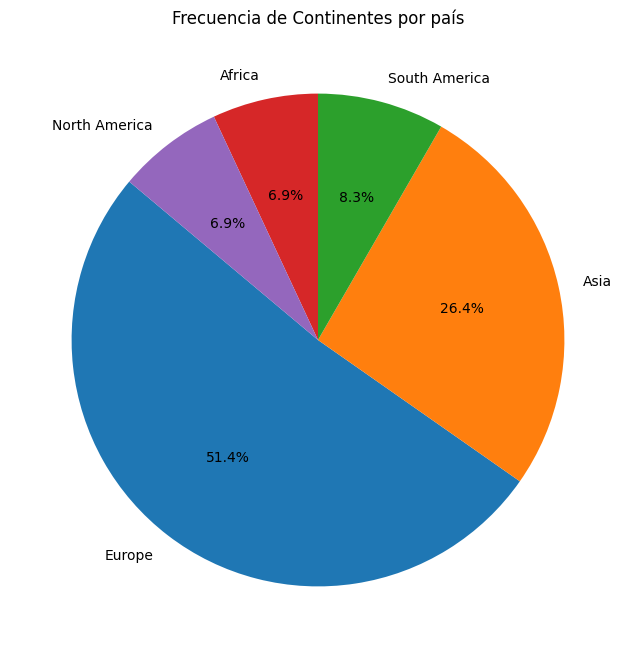

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(frecuencia, labels=frecuencia.index, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Frecuencia de Continentes por país')

# Mostrar el gráfico
plt.show()

Esta mal, hay q agrupar por date

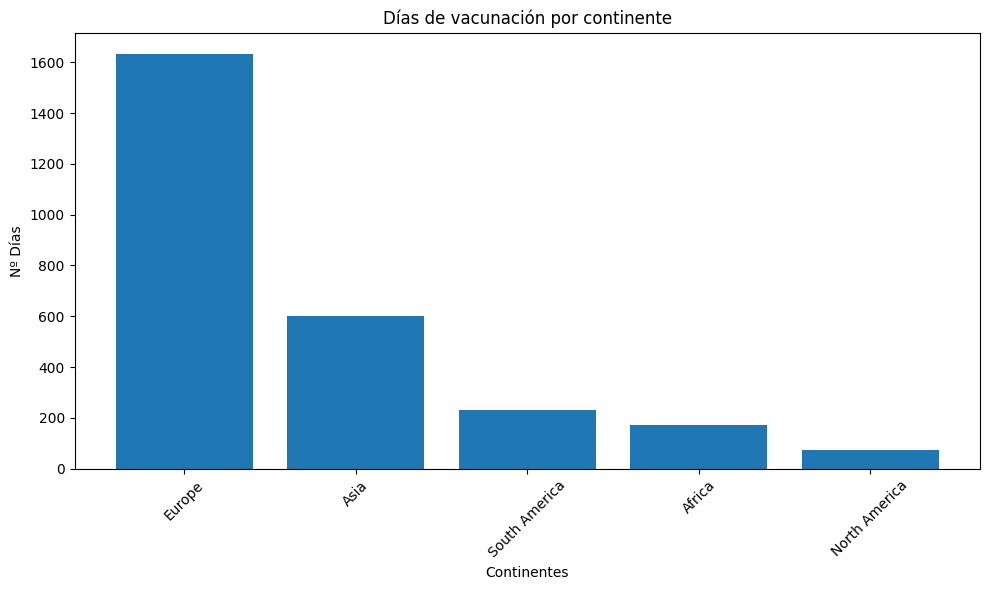

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(frecuencia.index, conteo2)

# Añadir título y etiquetas
plt.title('Días de vacunación por continente')
plt.xlabel('Continentes')
plt.ylabel('Nº Días')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()

**Estudio de NaNs**

Calculamos la suma de valores NaN

In [195]:
ds.isna().sum()

country                                   0
iso_code                                256
date                                      0
total_vaccinations                     1124
people_vaccinated                      1481
people_fully_vaccinated                2114
daily_vaccinations_raw                 1473
daily_vaccinations                      125
total_vaccinations_per_hundred         1124
people_vaccinated_per_hundred          1481
people_fully_vaccinated_per_hundred    2114
daily_vaccinations_per_million          125
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Concretamente, nos interesa los de la variable `people_vaccinated` que vamos a analizar y eliminar sus valores NaN.

In [196]:
conteo_nans = ds['people_vaccinated'].isna().sum()
conteo_no_nans = len(ds) - conteo_nans


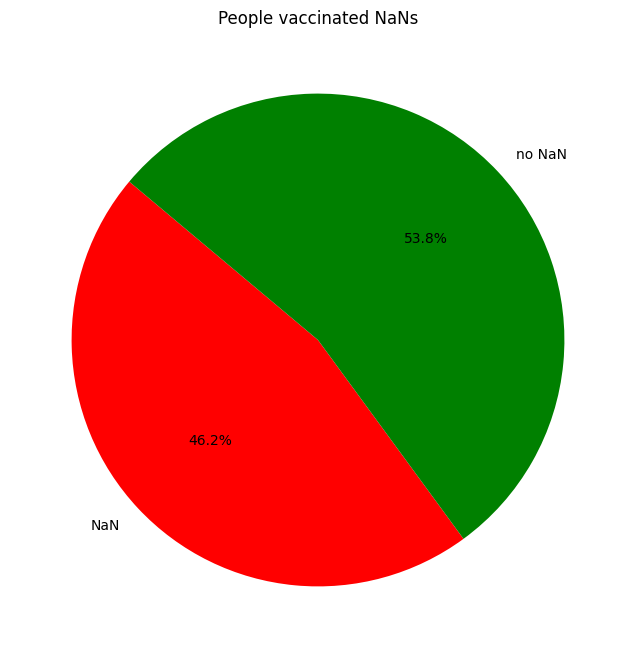

In [197]:
import matplotlib.pyplot as plt

# Datos de ejemplo
sizes = [conteo_nans, conteo_no_nans]
labels = ['NaN','no NaN']
colors = ['red', 'green']  # Rojo para el primer valor, verde para el segundo
# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors, startangle=140)

# Añadir título
plt.title('People vaccinated NaNs')

# Mostrar el gráfico
plt.show()

Y ahora ordenamos por país y fecha

In [198]:
# Ordenar las filas por país y fecha
ds = ds.sort_values(by=['country', 'date'])

# 1.
Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello
cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.

Como las filas ya están ordenadas por país y fecha, simplemente hay que tomar la media de las 3 entradas anteriores a un NaN

In [199]:
# creo una copia de ds para modificarla sin afectar al original
df = ds.copy()
id(df), id(ds)

(134110043952160, 134110109534912)

Este funciona pero no hace bien el cambio de pais la media

In [141]:
ds['people_vaccinated'] = ds.groupby('country')['people_vaccinated'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))

<ipython-input-141-823503e6fe87>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ds['people_vaccinated'] = ds.groupby('country')['people_vaccinated'].apply(lambda x: x.fillna(x.rolling(3, min_periods=1).mean()))


Este es el bueno

In [200]:
# Iterar sobre los NaN y calcular la media de los tres valores anteriores
for i, row in df.iterrows():
    if pd.isna(row['people_vaccinated']):
        # Para las entries que van de 0 a 2 (quedaria negativo al restar 3)
        start_index = i
        # Para que la primera entry de un pais no utilice datos del pais anterior
        for j in range(3):
          if i>1 and row['country'] == df.at[start_index-j, 'country']:
            start_index = start_index-1  # Índice de inicio para calcular la media

        end_index = i  # Índice final para calcular la media
        mean_value = df.iloc[start_index:end_index]['people_vaccinated'].mean()
        df.at[i, 'people_vaccinated'] = mean_value

In [201]:
cantidad_nan = df['people_vaccinated'].isna().sum()  # Reemplaza 'nombre_de_columna' con el nombre de la columna que deseas verificar

In [202]:
cantidad_nan

1

In [203]:
England = ds[ds['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
880,England,NaN,2020-12-13,55389.0,55389.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
881,England,NaN,2020-12-14,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
882,England,NaN,2020-12-15,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
883,England,NaN,2020-12-16,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
884,England,NaN,2020-12-17,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
885,England,NaN,2020-12-18,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
886,England,NaN,2020-12-19,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
887,England,NaN,2020-12-20,573858.0,573858.0,NaN,NaN,74067.0,1.02,1.02,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
888,England,NaN,2020-12-21,NaN,NaN,NaN,NaN,68942.0,NaN,NaN,NaN,1225.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
889,England,NaN,2020-12-22,NaN,NaN,NaN,NaN,63817.0,NaN,NaN,NaN,1134.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [204]:
England2= df[df['country'] == 'England']
England2.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
880,England,NaN,2020-12-13,55389.0,55389.000000,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
881,England,NaN,2020-12-14,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
882,England,NaN,2020-12-15,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
883,England,NaN,2020-12-16,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
884,England,NaN,2020-12-17,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
885,England,NaN,2020-12-18,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
886,England,NaN,2020-12-19,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
887,England,NaN,2020-12-20,573858.0,573858.000000,NaN,NaN,74067.0,1.02,1.02,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
888,England,NaN,2020-12-21,NaN,228212.000000,NaN,NaN,68942.0,NaN,NaN,NaN,1225.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
889,England,NaN,2020-12-22,NaN,285819.666667,NaN,NaN,63817.0,NaN,NaN,NaN,1134.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Comprobamos que se hayan modificado los valores NaN correctamente

In [186]:
if df['people_vaccinated'].isna().any():
    print("Hay valores NaN en la columna.")
else:
    print("No hay valores NaN en la columna.")

Hay valores NaN en la columna.


# 2.
De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.


In [205]:
# Agrupar por nombre y contar las entradas para cada uno
conteo = df.groupby('country').size()
conteo = conteo.sort_values(ascending=False)

Vemos los países con más entries, ya que cada entry es un día de vacunación en un país.

In [206]:
top_5 = conteo[:5]
print(top_5.dtypes)

int64


In [207]:
top_5

country
Wales               64
England             64
Scotland            64
Northern Ireland    64
United Kingdom      64
dtype: int64

In [208]:
top_5.index

Index(['Wales', 'England', 'Scotland', 'Northern Ireland', 'United Kingdom'], dtype='object', name='country')

In [209]:
dates = df['date'].unique()

Nos damos cuenta de que `United Kingdom` está compuesto por `Wales`, `England`, `Scotland`, `Northern Ireland`. Vamos a ver si los datos coinciden. Ya que en caso afirmativo, sería una variable dependiente (la suma de los países que lo componen) y no aporta información nueva.

In [223]:
 wales = df[df['country'] == 'Wales']
 wales = wales[wales['date' == dates[0]]]

KeyError: False

In [217]:
# con people vaccinated de los 4 paises si su suma da UK
suma = 0
for pais in top_5.index:
  suma = df[df['country'] == pais]['people_vaccinated'].sum() + suma

In [218]:
suma

620177187.9093878

In [220]:
suma2 = df[df['country'] == 'United Kingdom']['people_vaccinated'].sum()
suma2

310113136.23247176

In [ ]:
df[df['country'] == top_5[:4]]

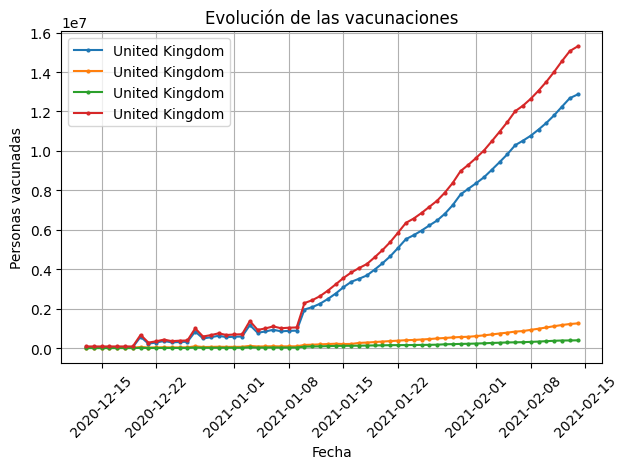

In [ ]:
import matplotlib.pyplot as plt
for pais in top_5[1:5].index:
  top5 = df[df['country'] == pais]

  # Crear el gráfico de líneas
  plt.plot(top5['date'], top5['people_vaccinated'], marker='o', linestyle='-', markersize=2)
  plt.legend(top5['country'])
# Configurar el título y etiquetas de los ejes
plt.title('Evolución de las vacunaciones')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
# Leyenda

plt.show()

In [50]:
England = ds[ds['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Continent


In [51]:
England = df[df['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Continent
